<a href="https://colab.research.google.com/github/Abhi-213/Deep-learning/blob/main/number_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip list


In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import DataLoader
from torchvision import datasets,transforms
from torchvision.utils import make_grid

import numpy as np
import pandas as pd
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#convert image to tensor(images,height,width,color)
transform = transforms.ToTensor()

In [ ]:
#train data
train_data = datasets.MNIST(root='/cnn_data',train=True,download=True,transform=transform)

In [ ]:
#test data
test_data = datasets.MNIST(root='/cnn_data',train=False,download=True,transform=transform)

In [ ]:
test_data

In [ ]:
pwd

In [ ]:
ls


In [ ]:
#create batch size
train_loader = DataLoader(train_data,batch_size=10,shuffle=True)
test_loader = DataLoader(test_data,batch_size=10,shuffle=False)

In [ ]:
#model classs
class simplecnn(nn.Module):
  def __init__(self):
    super().__init__()
    self.conv1 = nn.Conv2d(1,6,3,1)
    self.conv2 = nn.Conv2d(6,16,3,1)
    #full connected layer
    self.fc1 = nn.Linear(5*5*16,120)
    self.fc2 = nn.Linear(120,84)
    self.fc3 = nn.Linear(84,10)

  def forward(self,X):
    X = F.relu(self.conv1(X))
    X = F.max_pool2d(X,2,2)
    X = F.relu(self.conv2(X))
    X = F.max_pool2d(X,2,2)

    X=X.view(-1,5*5*16)
    X = F.relu(self.fc1(X))
    X = F.relu(self.fc2(X))
    X = self.fc3(X)
    return F.log_softmax(X,dim=1)


In [ ]:
#instence
torch.manual_seed(41)
model = simplecnn()
model

In [ ]:
#loss
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(),lr=0.001)

In [15]:
import time
start_time = time.time()

#create variable
epochs = 5
train_losses = []
test_losses = []
train_correct = []
test_correct = []

#for loop
for i in range(epochs):
  trn_corr = 0
  tst_corr = 0

  #train
  for b,(X_train,y_train) in enumerate(train_loader):
    b+=1
    y_pred = model(X_train)
    loss = criterion(y_pred,y_train)
    predicted = torch.max(y_pred.data,1)[1]
    batch_corr = (predicted == y_train).sum()
    trn_corr += batch_corr

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    if b%100 == 0:
      print(f'epoch:{i} Batch: {b} loss:{loss.item()}')

  train_losses.append(loss)
  train_correct.append(trn_corr)

  #test
  with torch.no_grad():
    for b,(X_test,y_test) in enumerate(test_loader):
      y_val = model(X_test)
      predicted = torch.max(y_val.data,1)[1]
      tst_corr += (predicted == y_test).sum()

  loss = criterion(y_val,y_test)
  test_losses.append(loss)
  test_correct.append(tst_corr)






current_time = time.time()
print((current_time-start_time)/60)


epoch:0 Batch: 100 loss:0.9812231063842773
epoch:0 Batch: 200 loss:0.43812650442123413
epoch:0 Batch: 300 loss:0.28931525349617004
epoch:0 Batch: 400 loss:0.08598048985004425
epoch:0 Batch: 500 loss:0.33633095026016235
epoch:0 Batch: 600 loss:0.1623610556125641
epoch:0 Batch: 700 loss:0.5226176977157593
epoch:0 Batch: 800 loss:0.6974474191665649
epoch:0 Batch: 900 loss:0.20160897076129913
epoch:0 Batch: 1000 loss:0.5349848866462708
epoch:0 Batch: 1100 loss:0.8624889254570007
epoch:0 Batch: 1200 loss:0.1502392590045929
epoch:0 Batch: 1300 loss:0.025196203961968422
epoch:0 Batch: 1400 loss:0.3291054666042328
epoch:0 Batch: 1500 loss:0.055179618299007416
epoch:0 Batch: 1600 loss:0.05321278050541878
epoch:0 Batch: 1700 loss:0.07852675765752792
epoch:0 Batch: 1800 loss:0.4744560718536377
epoch:0 Batch: 1900 loss:0.03948891535401344
epoch:0 Batch: 2000 loss:0.5566567182540894
epoch:0 Batch: 2100 loss:0.026368603110313416
epoch:0 Batch: 2200 loss:0.05482446029782295
epoch:0 Batch: 2300 loss:0

In [17]:
test_data[4141][0].reshape(28,28)

tensor([[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000],
        [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000

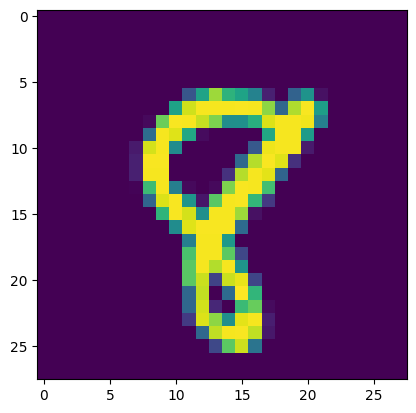

In [19]:
plt.imshow(test_data[4141][0].reshape(28,28))

In [20]:
model.eval()
with torch.no_grad():
  output = model(test_data[4141][0].reshape(1,1,28,28))

In [23]:
output.argmax()

tensor(8)